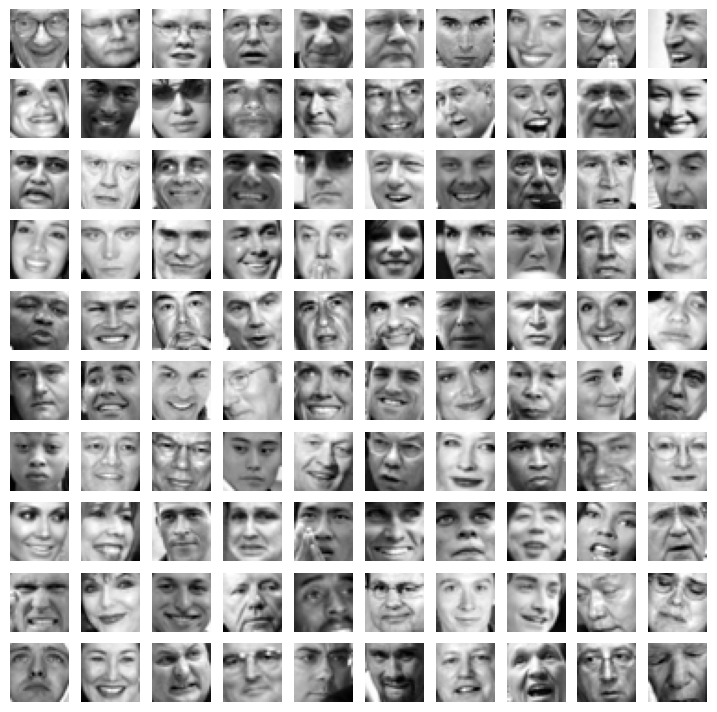

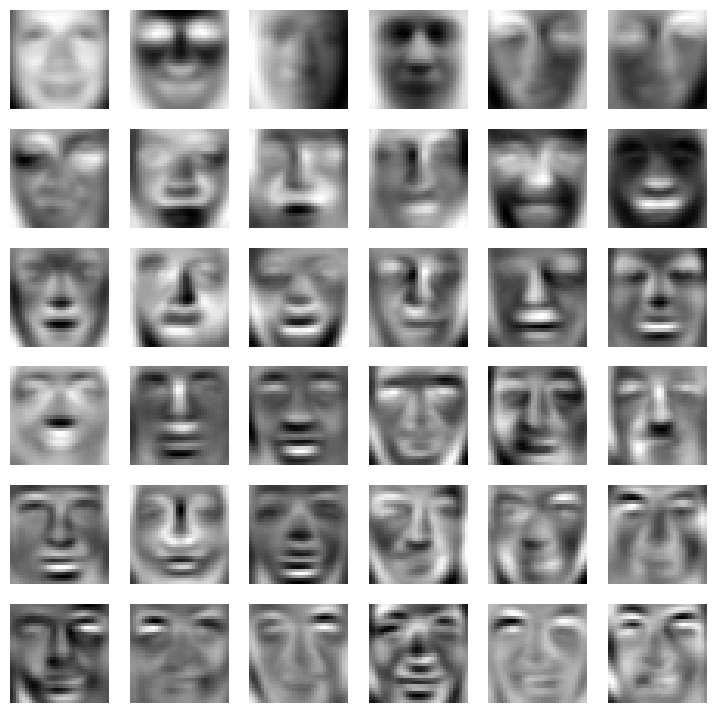

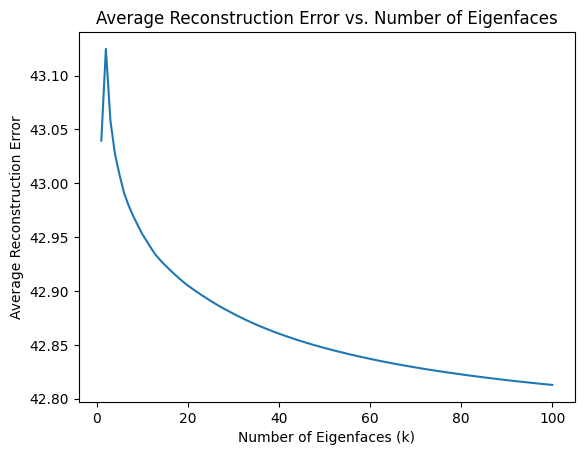

Average Errors for each k:
k=1: 43.03960665188931
k=2: 43.1246899060918
k=3: 43.05798239801987
k=4: 43.02707381873921
k=5: 43.007788984942884
k=6: 42.99089649564435
k=7: 42.97931887783191
k=8: 42.96962190141061
k=9: 42.96104301004623
k=10: 42.95284084225734
k=11: 42.946099721767744
k=12: 42.939324449827105
k=13: 42.93316528411086
k=14: 42.92840427310082
k=15: 42.92398569774754
k=16: 42.919879314065966
k=17: 42.91586449376983
k=18: 42.91209844222641
k=19: 42.90843140638138
k=20: 42.90511373104862
k=21: 42.9020823032174
k=22: 42.89913454208623
k=23: 42.896284834613326
k=24: 42.893564734516616
k=25: 42.890852080387184
k=26: 42.888272686937896
k=27: 42.88575056222742
k=28: 42.883438866835064
k=29: 42.88119266392904
k=30: 42.87891071393661
k=31: 42.876785148982364
k=32: 42.87468463018884
k=33: 42.872666178712215
k=34: 42.87071140211944
k=35: 42.86884541595353
k=36: 42.867067180336335
k=37: 42.86532977467323
k=38: 42.86367185282587
k=39: 42.86201359074671
k=40: 42.86046102263877
k=41: 42.858

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the faces.mat file
data = loadmat('faces.mat')
X = data['X']  # The matrix is stored with the key 'X'

# Plot the first 100 face images
fig, axes = plt.subplots(10, 10, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    face_image = X[i, :].reshape(32, 32).T  # Reshape and transpose to display correctly
    ax.imshow(face_image, cmap='gray')
    ax.axis('off')
plt.show()

# Given function to perform SVD
def compute_svd(X):
    # Compute the covariance matrix
    C = np.dot(X.T, X) / (X.shape[0] - 1)

    # Power iteration method to find eigenvalues and eigenvectors
    def power_iteration(A, num_simulations):
        # Randomly initialize the vector b
        b_k = np.random.rand(A.shape[1])

        for _ in range(num_simulations):
            # Calculate the matrix-by-vector product Ab
            b_k1 = np.dot(A, b_k)

            # Calculate the norm
            b_k1_norm = np.sqrt(sum(b_k1**2))

            # Re-normalize the vector
            b_k = b_k1 / b_k1_norm

        return b_k, b_k1_norm

    # Compute eigenvalues and eigenvectors using power iteration
    eigenvalues = []
    eigenvectors = []
    for i in range(X.shape[1]):
        eigenvector, eigenvalue = power_iteration(C, 1000)
        eigenvalues.append(eigenvalue)
        eigenvectors.append(eigenvector)
        # Deflate the covariance matrix
        C = C - eigenvalue * np.outer(eigenvector, eigenvector)

    # Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = np.array(eigenvalues)[sorted_indices]
    eigenvectors = np.array(eigenvectors)[sorted_indices]

    # Computation of singular values
    S = np.sqrt(eigenvalues)

    # Compute the U matrix
    U = np.dot(X, eigenvectors.T)

    # Normalize U
    for i in range(U.shape[1]):
        U[:, i] /= np.sqrt(sum(U[:, i]**2))


    return U, S, eigenvectors

# Reconstruct faces and plot error
def reconstruct_faces_and_plot_error(X, U, S, V):
    mean_face = np.mean(X, axis=0)
    centered_X = X - mean_face
    k_values = range(1, 101)
    average_errors = []

    for k in k_values:
        # Use the first k eigenfaces to reconstruct the faces
        U_k = U[:, :k]
        S_k = np.diag(S[:k])
        V_k = V[:k, :]
        X_reconstructed = np.dot(U_k, np.dot(S_k, V_k)) + mean_face

        # Compute the reconstruction error
        errors = np.sqrt(np.mean((centered_X - X_reconstructed) ** 2, axis=1))
        average_error = np.mean(errors)
        average_errors.append(average_error)

    # Plot the average reconstruction error versus k
    plt.plot(k_values, average_errors)
    plt.xlabel('Number of Eigenfaces (k)')
    plt.ylabel('Average Reconstruction Error')
    plt.title('Average Reconstruction Error vs. Number of Eigenfaces')
    plt.show()

    return average_errors

# Assuming X is already defined and is the matrix of face images
# Perform SVD on X
U, S, V = compute_svd(X)


# Plot the first 36 eigenfaces
fig, axs = plt.subplots(6, 6, figsize=(9, 9))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(np.reshape(V[i, :], (32, 32), order='F'), cmap='gray')
    ax.axis('off')
plt.show()


# Call the function to reconstruct faces and plot the error
average_errors = reconstruct_faces_and_plot_error(X, U, S, V)

# Output the values of average_errors
print("Average Errors for each k:")
for k, error in zip(range(1, 101), average_errors):
    print(f"k={k}: {error}")